In [1]:
import numpy as np
import pandas as pd



This is an exploratory analysis of the Movie 100K dataset for our recommender system project

In [3]:
items_file = r"C:\Users\yyBee\Datasets\ml-100k\ml-100k\u.item"
ratings_file = r"C:\Users\yyBee\Datasets\ml-100k\ml-100k\u.data"
users_file = r"C:\Users\yyBee\Datasets\ml-100k\ml-100k\u.user"

In [4]:
column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(users_file, sep = '|', names = column_names)


In [7]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [76]:
users.to_csv(r'C:\Users\yyBee\Datasets\ml-100k\user_info.csv')

In [10]:
names = ['user_id' , 'item_id' , 'rating' , 'timestamp']
ratings = pd.read_csv(ratings_file, sep = '\t', names = names)

In [12]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [14]:
with open(items_file, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.readlines()

# Use pandas to read the content
from io import StringIO
data = StringIO(''.join(content))


temp_column_names = [i for i in range(25)]
items = pd.read_csv(data, sep = '|', names = temp_column_names)

In [16]:
items = items.drop([3,4,24],axis =1)

In [17]:
item_genres = items.iloc[:,3:]
item_genres =  item_genres.values.tolist()
item_genres = [np.array(row) for row in item_genres]

In [20]:
items = items.iloc[:,:3]

In [22]:
items['genres'] = item_genres

In [70]:
items = items.set_axis(['movie_id','title','date','genre'],axis = 1)
items

,movie_id,title,date,genre
0,1,Toy Story (1995),01-Jan-1995,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,GoldenEye (1995),01-Jan-1995,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,Four Rooms (1995),01-Jan-1995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,Get Shorty (1995),01-Jan-1995,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,5,Copycat (1995),01-Jan-1995,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1678,1679,B. Monkey (1998),06-Feb-1998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1679,1680,Sliding Doors (1998),01-Jan-1998,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."
1680,1681,You So Crazy (1994),01-Jan-1994,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [72]:
items.to_csv(r'C:\Users\yyBee\Datasets\ml-100k\movies_info.csv')

A closer look at the genres:

In [48]:
with open(items_file, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.readlines()

# Use pandas to read the content
from io import StringIO
data = StringIO(''.join(content))
temp_column_names = [i for i in range(25)]
genre_tab = pd.read_csv(data, sep = '|', names = temp_column_names)

In [50]:
genre_tab = genre_tab.iloc[:,5:24]


In [56]:
name =['unknown','Action', 'Adventure', 'Animation',
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western']

genre_tab = genre_tab.set_axis(name,axis =1)
genre_tab


,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Count the occurence of each genre
genre_count = genre_tab.sum()
list(genre_count)

[2,
 251,
 135,
 42,
 122,
 505,
 109,
 50,
 725,
 22,
 24,
 92,
 56,
 61,
 247,
 101,
 251,
 71,
 27]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Children'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Film-Noir'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Musical'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Romance'),
  Text(15, 0, 'Sci-Fi'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

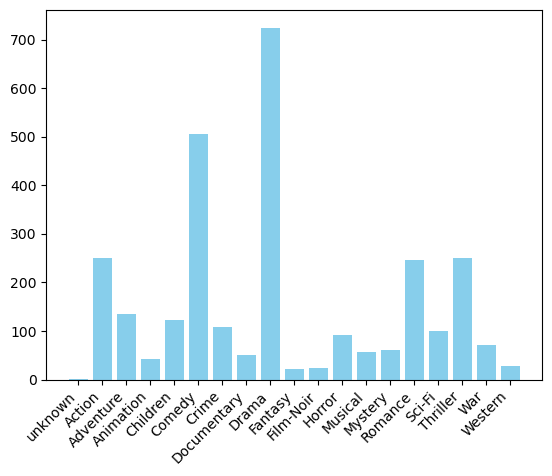

In [66]:
import matplotlib.pyplot as plt

plt.bar(name, list(genre_count), color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10) 

From the bar plot above, the predominant genres are Drama and Comedy

Potentially useful variables by intuition:

Scheme 1
*Action space*
Each movie vector/id, which should include/be linked to：
1. The titles of the movies: the similarity can be used as a criteria for recommendation
2. Year, title, genre, and tags, and average rating of the movie can help.

*Observations*
1. An user's average rating (related to the genre or not)
2. Some generization of the users' preference. (year, title, tags, average rating)

Reward = the actual rating of the user.
   

----------------------------------First explore the possible genres---------------------------------------

In [ ]:
def genre_list(row):
    return row.split('|')

In [ ]:
genre = pd.DataFrame(movies['genres']).applymap(genre_list)

In [ ]:
genre

In [ ]:
biglist = list(genre['genres'])
union = []
for l in biglist:
    union += l
union = set(union)

In [ ]:
# The list of possible genres, not a lot, good news. Can have a graph of them.
union

Suggested state expression for genre: MultiDiscrete([2]*19) [ 0 0 0 0 0 ....] for no genre label


-----------------------------Next: the tags------------------------------
What someone is saying about the film. Can be understood as one sentense film criticism
Can be used for 1. sentiment analysis (may overlap with rating) 2. keyword extraction.

In [ ]:
tags_list = list(tags['tag'])

In [ ]:
set(tags_list)

In [ ]:
len(tags_list)

In [ ]:
len(set(tags_list)) #man this is still ALOT

hat we potentially need in our model structure: 
something that can relate rating to subcategories
something that can relate user to keywords and subcategories


In [ ]:
c = pd.DataFrame(ratings.groupby('movieId').size()).sort_values(by=0, ascending=False)

In [ ]:
c

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
id = list(c.index)

In [ ]:
list(c[0])

In [ ]:
plt.bar([i for i in range(1,2001)],list(c[0])[:2000])

In [ ]:
c[c[0]>100]

In [ ]:
c[c[0]>50] #let 50 be the threshod.